# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response=requests.get(query_url+"new york")
response_json = response.json()
print (response.json())

{'coord': {'lon': -73.99, 'lat': 40.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 11.81, 'pressure': 1019, 'humidity': 62, 'temp_min': 8.89, 'temp_max': 14.44}, 'visibility': 16093, 'wind': {'speed': 1.5, 'deg': 320}, 'clouds': {'all': 1}, 'dt': 1573484991, 'sys': {'type': 1, 'id': 5141, 'country': 'US', 'sunrise': 1573472272, 'sunset': 1573508531}, 'timezone': -18000, 'id': 5128581, 'name': 'New York', 'cod': 200}


In [8]:
data = []
i=0
for city in cities:
    json = requests.get(query_url + city).json()
    i=i+1
    try:
        tempmax=json["main"]['temp_max']
        humidity=json["main"]['humidity']
        clouds=json["clouds"]['all']
        wind_speed=json["wind"]['speed']
        lat=json["coord"]['lat']
        lon=json["coord"]['lon']
        country=json["sys"]['country']
        date=json["dt"]
        data.append([tempmax, humidity, clouds, wind_speed, lat, lon, country, date])
        print(f"counter {i} || {city}")
        time.sleep(.1)
    except:
        print ("city not found")
        

counter 1 || ourem
counter 2 || saint-augustin
city not found
counter 4 || jamestown
counter 5 || hobart
counter 6 || benguela
city not found
counter 8 || beloha
counter 9 || padang
counter 10 || albany
counter 11 || provideniya
counter 12 || bluff
counter 13 || mar del plata
counter 14 || portobelo
counter 15 || hilo
counter 16 || ushtobe
counter 17 || qaanaaq
counter 18 || vila velha
city not found
counter 20 || hasaki
counter 21 || quatre cocos
counter 22 || hambantota
counter 23 || ponta do sol
counter 24 || vicam
counter 25 || rikitea
counter 26 || tokur
counter 27 || hermanus
counter 28 || ushuaia
city not found
city not found
counter 31 || punta arenas
counter 32 || ashland
counter 33 || cuamba
counter 34 || sucre
counter 35 || saskylakh
counter 36 || jalingo
counter 37 || sao gabriel da cachoeira
counter 38 || mataura
counter 39 || bereda
counter 40 || bani
counter 41 || mhlume
city not found
counter 43 || hithadhoo
counter 44 || constitucion
counter 45 || yeppoon
counter 46 ||

city not found
counter 359 || torbay
counter 360 || chunoyar
counter 361 || kloulklubed
counter 362 || lubao
counter 363 || severodvinsk
counter 364 || kidal
counter 365 || keningau
counter 366 || kruisfontein
counter 367 || shache
counter 368 || bitung
counter 369 || nileshwar
counter 370 || poso
counter 371 || fernie
counter 372 || gushikawa
counter 373 || palana
counter 374 || heinola
counter 375 || maragogi
counter 376 || nome
counter 377 || cine
counter 378 || tezu
counter 379 || belaya gora
counter 380 || oron
counter 381 || tateyama
counter 382 || sao filipe
counter 383 || dunedin
city not found
counter 385 || narsaq
counter 386 || rawlins
counter 387 || sisimiut
counter 388 || sinnamary
counter 389 || gat
counter 390 || maymyo
counter 391 || labytnangi
city not found
city not found
counter 394 || grandview
counter 395 || meulaboh
counter 396 || talara
counter 397 || opuwo
counter 398 || matara
city not found
counter 400 || cayenne
counter 401 || dargaville
counter 402 || avera


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
data_df = pd.DataFrame(data,columns=["tempmax","humidity","clouds","wind_speed","lat","lon","country","date"])
data_df.head()

,tempmax,humidity,clouds,wind_speed,lat,lon,country,date
0,16.67,77,40,7.20,39.64,-8.59,PT,1573485357
1,-4.44,67,90,4.10,45.63,-73.98,CA,1573485358
2,12.06,92,8,6.22,-33.21,138.60,AU,1573485359
3,13.33,71,75,6.70,-42.88,147.33,AU,1573485359
4,26.98,81,83,3.65,-12.58,13.40,AO,1573485360


Text(0.5, 0, 'Latitude')

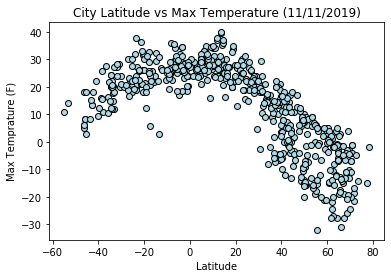

In [10]:
date=time.strftime("%d/%m/%Y")
date
plt.scatter(data_df["lat"],data_df["tempmax"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

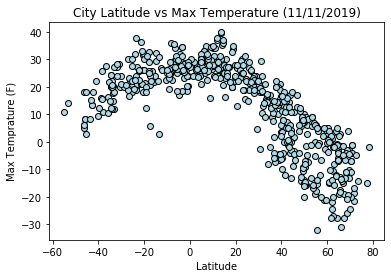

In [13]:
plt.scatter(data_df["lat"],data_df["tempmax"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")

#### Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

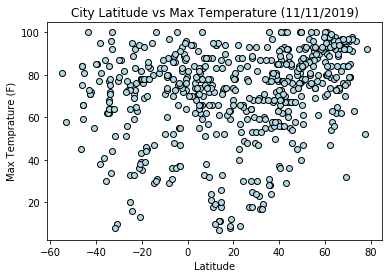

In [14]:
plt.scatter(data_df["lat"],data_df["humidity"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")

#### Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

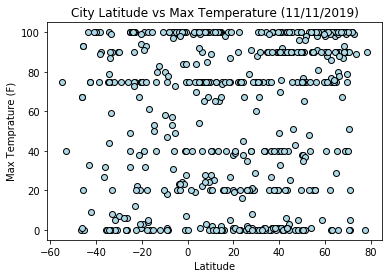

In [15]:
plt.scatter(data_df["lat"],data_df["clouds"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")

#### Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

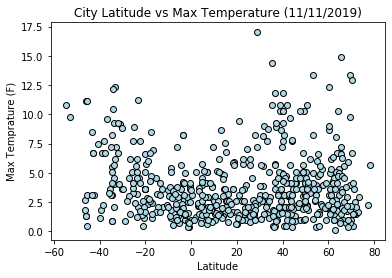

In [16]:
plt.scatter(data_df["lat"],data_df["wind_speed"],c="lightblue",edgecolor='black')
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")